## Atividade de Sinais e Sistemas II - 2ª Unidade

Discentes:
- Alec Santos
- Alexandre Pinho
- Arthur Moreira
- Daniel Marinho
- Felipe Ribeiro
- Lucas Cabral

<p>Docente: Artur Passos Dias Lima

Data da apresentação: 27/10/2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def plotar_sinal_discreto(sinal: np.array, range:list=list(), title:str=str(), x:str=str(), y:str=str()):
    if len(range) > 0:
      plt.stem(range, sinal, use_line_collection=True)
    else:
      plt.stem(sinal, use_line_collection=True)
    if len(title) > 0:
      plt.title(f'Sinal no tempo discreto | {title}')
    else:
      plt.title('Sinal no tempo discreto')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()
    plt.tight_layout()

In [ ]:
def calcular_dft(sinal) -> np.array:
    N = len(sinal)
    DFT = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            DFT[k] += sinal[n] * np.exp(-1j * np.pi * k * n / N)
    return DFT

In [ ]:
def calcular_idft(sinal) -> np.array:
    N = len(sinal)
    IDFT = np.zeros(N, dtype=complex)

    for n in range(N):
        for k in range(N):
            IDFT[n] += sinal[k] * np.exp(1j * np.pi * k * n / N)
    return IDFT

## Questão 01

### Letra a)

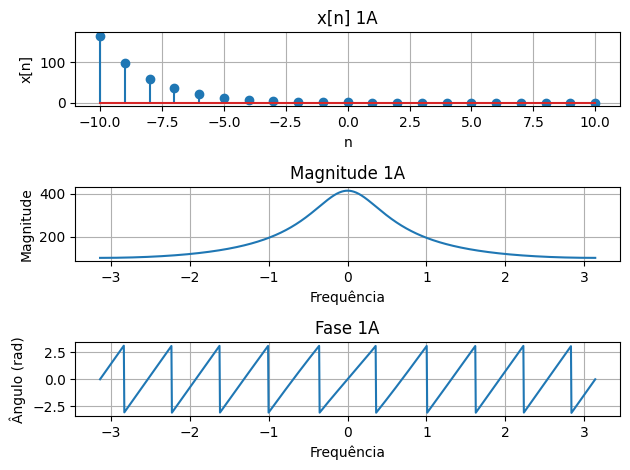

In [ ]:
# Intervalo de frequência de -π a π
w = np.linspace(-np.pi, np.pi, num=1000)

# Definindo x[n]
n = np.arange(-10, 11)
x = ((6/10) ** n) * (np.heaviside(n + 10, 1) - np.heaviside(n - 11, 1))
###                       0   if x1 < 0
### heaviside(x1, x2) =  x2   if x1 == 0
###                       1   if x1 > 0

# Inicializar magnitude e o fase
magnitude = []
fase = []

# DTFT
for omega in w:
    X_omega = np.sum(x * np.exp(-1j * omega * n))
    magnitude.append(abs(X_omega))
    fase.append(np.angle(X_omega))

# Gráfico x[n]
plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title('x[n] 1A')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid()

# Gráfico de magnitude
plt.subplot(3, 1, 2)
plt.plot(w, magnitude)
plt.title('Magnitude 1A')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()

# Gráfico Fase
plt.subplot(3, 1, 3)
plt.plot(w, fase)
plt.title('Fase 1A')
plt.xlabel('Frequência')
plt.ylabel('Ângulo (rad)')
plt.grid()

plt.tight_layout()
plt.show()


### Letra b)

<ipython-input-113-6aa668787247>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x, use_line_collection=True)


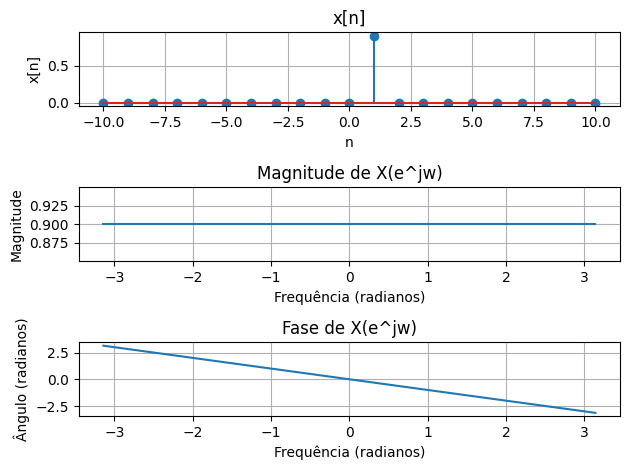

In [ ]:
# Intervalo de frequência de -π a π
w = np.linspace(-np.pi, np.pi, num=1000)

# Definir x[n]
n = np.arange(-10, 11)
x = n * (0.9 ** n) * (np.heaviside(n, 1) - np.heaviside(n - 2, 1))

# Inicializar magnitude e a fase
magnitude = []
fase = []

# DTFT
for omega in w:
    X_omega = np.sum(x * np.exp(-1j * omega * n))
    magnitude.append(abs(X_omega))
    fase.append(np.angle(X_omega))

# Gráfico x[n]
plt.subplot(3, 1, 1)
plt.stem(n, x, use_line_collection=True)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid()

# Gráfico de magnitude
plt.subplot(3, 1, 2)
plt.plot(w, magnitude)
plt.title('Magnitude de X(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude')
plt.grid()

# Gráfico da fase
plt.subplot(3, 1, 3)
plt.plot(w, fase)
plt.title('Fase de X(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Ângulo (radianos)')
plt.grid()

plt.tight_layout()
plt.show()


---

## Questão 2

### Letra a)

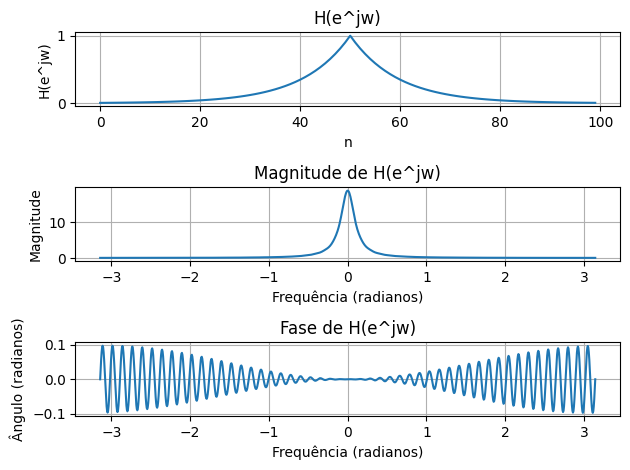

In [ ]:
# Intervalo de frequência de -π a π
w = np.linspace(-np.pi, np.pi, num=1000)

n = np.arange(-50, 50)

### h[n] = (0,9)^|n|
h = (0.9) ** np.abs(n)

# Inicializando magnitude e a fase
magnitude = []
fase = []

# DTFT
for omega in w:
    H_omega = np.sum(h * np.exp(-1j * omega * n))
    magnitude.append(abs(H_omega))
    fase.append(np.angle(H_omega))

# Gráfico H(e^jw)
plt.subplot(3, 1, 1)
plt.plot(h)
plt.title('H(e^jw)')
plt.xlabel('n')
plt.ylabel('H(e^jw)')
plt.grid()

# Gráfico de magnitude
plt.subplot(3, 1, 2)
plt.plot(w, magnitude)
plt.title('Magnitude de H(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude')
plt.grid()

# Gráfico da fase
plt.subplot(3, 1, 3)
plt.plot(w, fase)
plt.title('Fase de H(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Ângulo (radianos)')
plt.grid()

plt.tight_layout()
plt.show()

### Letra b)

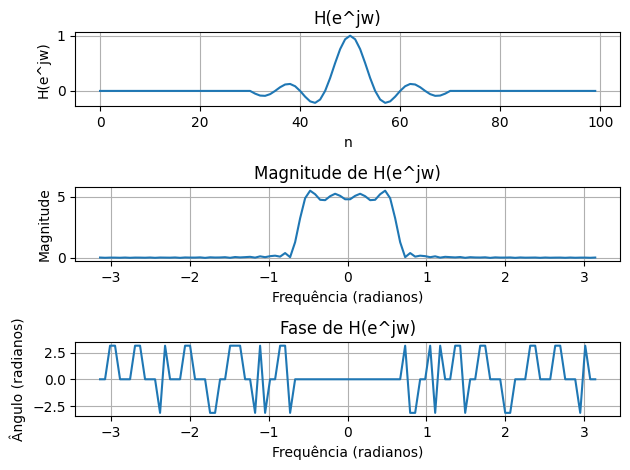

In [ ]:
# Intervalo de frequência de -π a π
w = np.linspace(-np.pi, np.pi, num=100)

n = np.arange(-50, 50)

### h[n] = sinc(0,2n)[u(n + 20) − u(n − 20)]
h = np.sinc(0.2*n) * ((n >= -20) & (n <= 20))

# Inicializando magnitude e a fase
magnitude = []
fase = []

# DTFT
for omega in w:
    H_omega = np.sum(h * np.exp(-1j * omega * n))
    magnitude.append(abs(H_omega))
    fase.append(np.angle(H_omega))

# Gráfico h[n]
plt.subplot(3, 1, 1)
plt.plot(h)
plt.title('H(e^jw)')
plt.xlabel('n')
plt.ylabel('H(e^jw)')
plt.grid()

# Gráfico de magnitude
plt.subplot(3, 1, 2)
plt.plot(w, magnitude)
plt.title('Magnitude de H(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Magnitude')
plt.grid()

# Gráfico da fase
plt.subplot(3, 1, 3)
plt.plot(w, fase)
plt.title('Fase de H(e^jw)')
plt.xlabel('Frequência (radianos)')
plt.ylabel('Ângulo (radianos)')
plt.grid()

plt.tight_layout()
plt.show()

---

### Questão 3

#### Letra a)

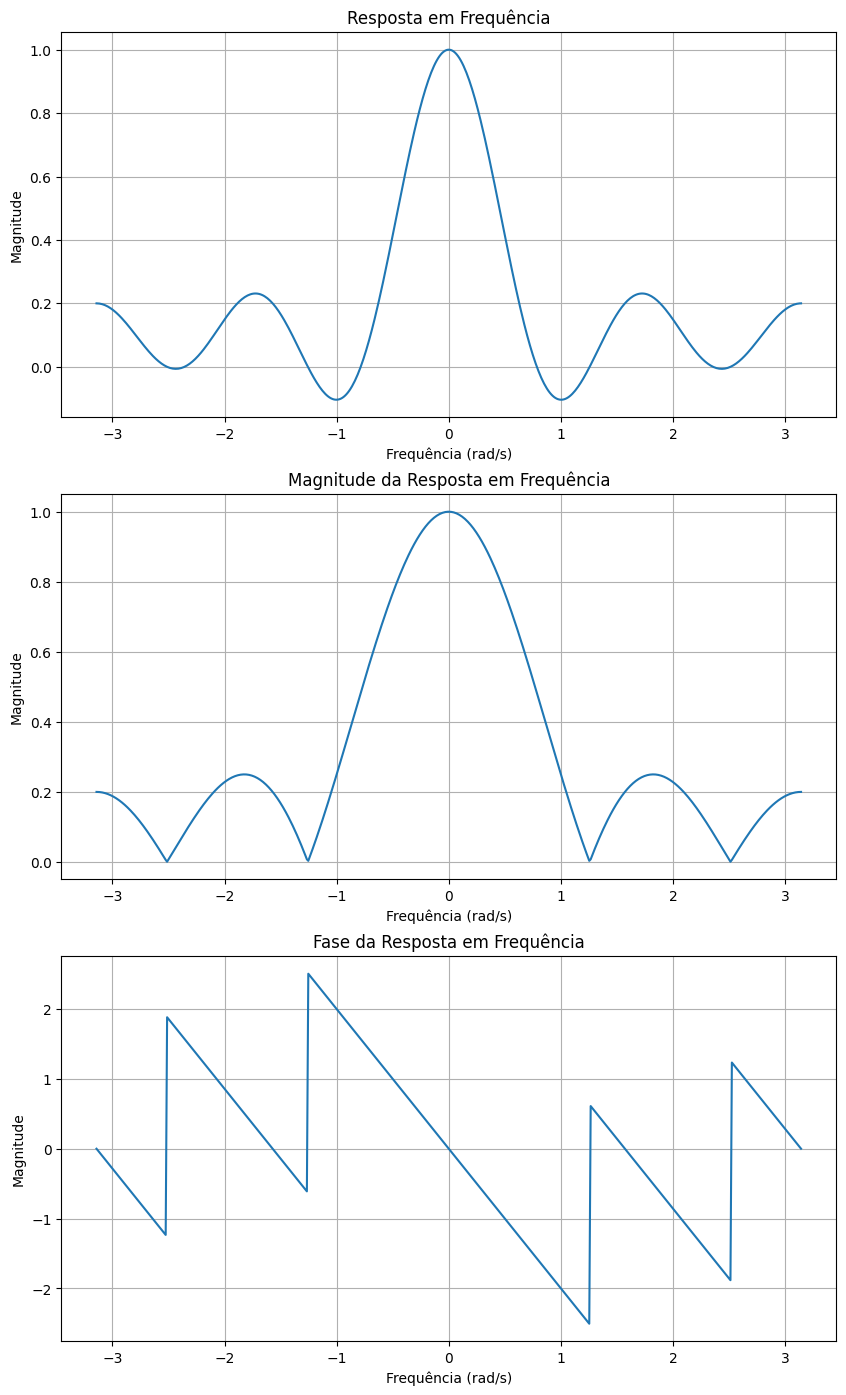

In [ ]:
# Coeficientes da equação de diferenças
y = [1]
x = [1/5, 1/5, 1/5, 1/5, 1/5]

# Frequências para a resposta em frequência
w = np.linspace(-np.pi, np.pi, 500)

# Resposta em frequência
H = np.polyval(x[::-1], np.exp(-1j*w)) / np.polyval(y[::-1], np.exp(-1j*w))

# Plot da magnitude da resposta em frequência
plt.figure(figsize=(10, 17))
plt.subplot(3, 1, 1)
plt.plot(w, H)
plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w, abs(H))
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w, np.angle(H))
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


#### Letra b)

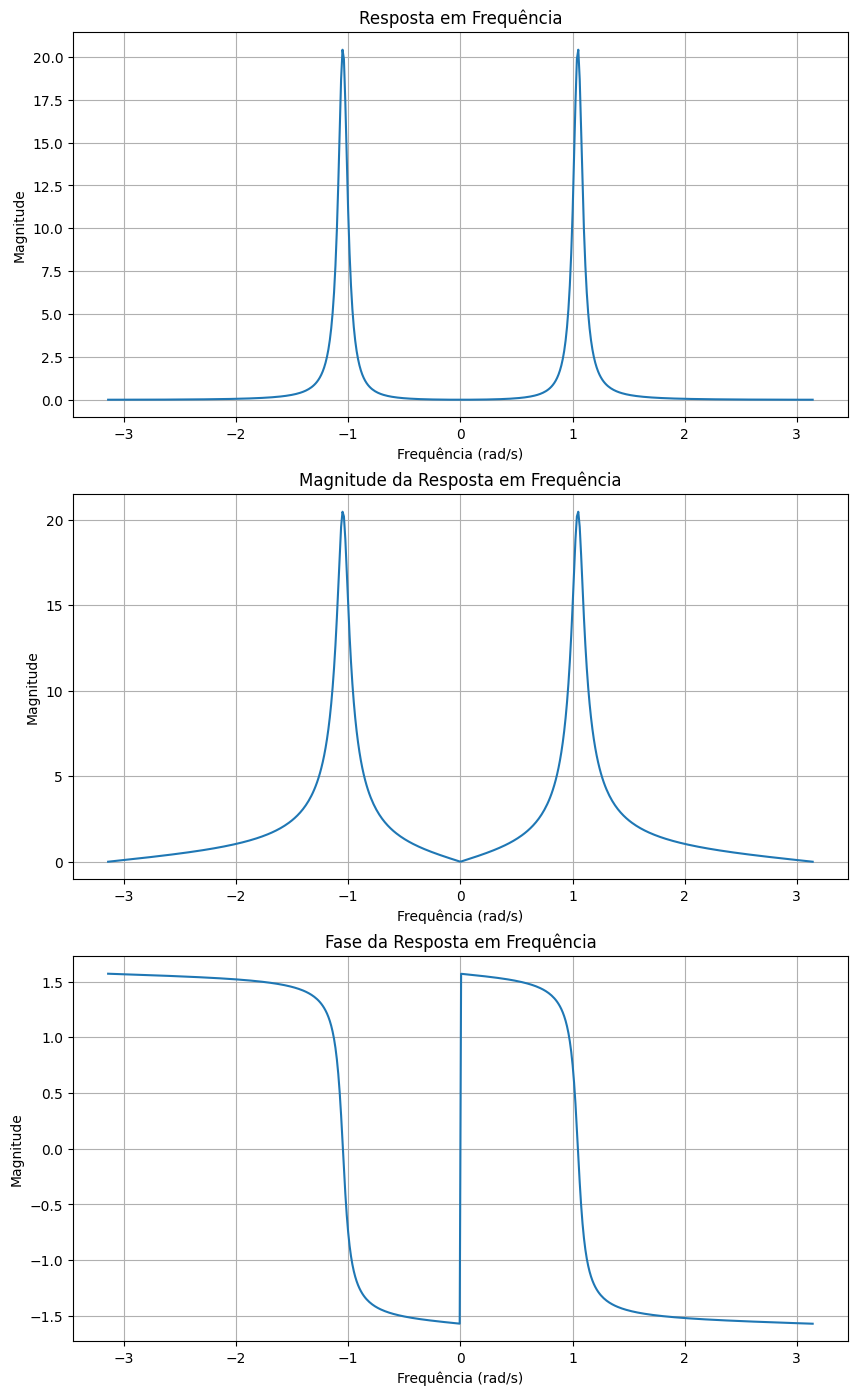

In [ ]:
# Coeficientes da equação de diferenças
y = [1, -0.95, 0.9025]
x = [1, 0, -1]

# Frequências para a resposta em frequência
w = np.linspace(-np.pi, np.pi, 500)

# Resposta em frequência
H = np.polyval(x[::-1], np.exp(-1j*w)) / np.polyval(y[::-1], np.exp(-1j*w))

# Plot da magnitude da resposta em frequência
plt.figure(figsize=(10, 17))
plt.subplot(3, 1, 1)
plt.plot(w, H)
plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w, abs(H))
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w, np.angle(H))
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


---

### Questão 4

<ipython-input-109-26693da91d5e>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range, sinal, use_line_collection=True)


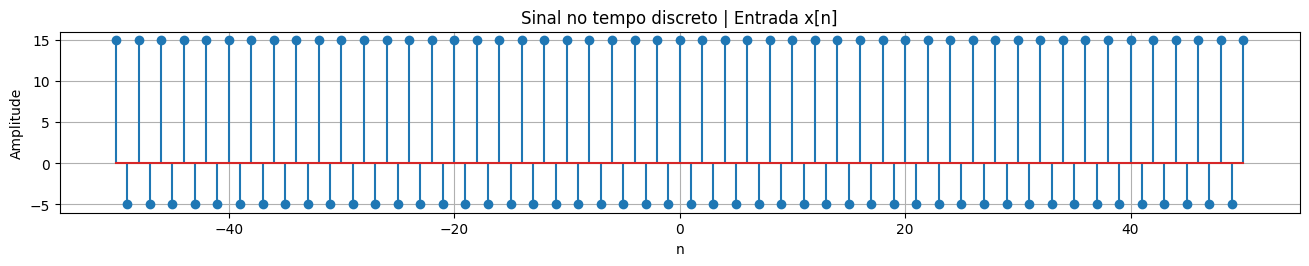

<Figure size 640x480 with 0 Axes>

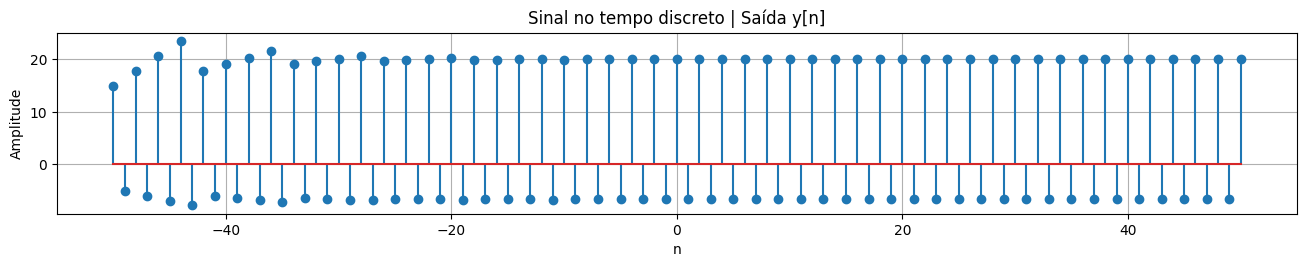

<Figure size 640x480 with 0 Axes>

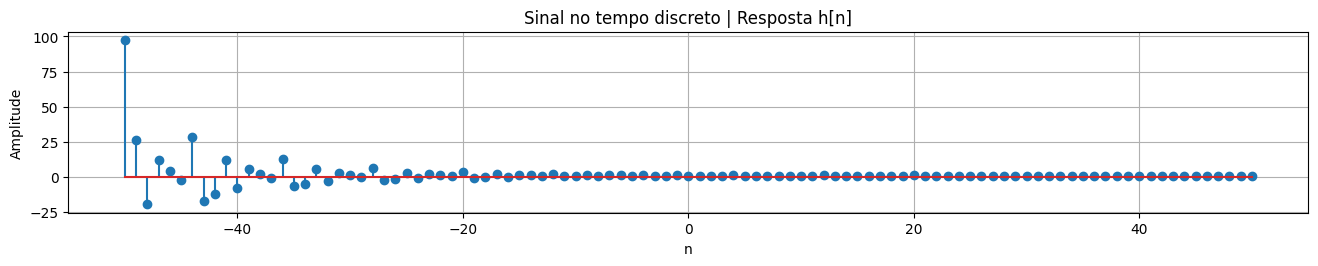

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calcular x[n]
def x(n):
    return 5 + 10 * (-1) ** n

# Intervalo de n de -50 a 50
n_values = range(-50, 51)

# Inicializando x[n] e y[n]
x_values = [x(n) for n in n_values]
y_values = []

# Calcular y[n]
for n in n_values:
    y_n = 0
    for m in range(4):
        if (n - 2 * m) >= -50:
            y_n += x(n - 2 * m)
    for l in range(1, 4):
        if (n - 2 * l) >= -50:
            y_n -= 0.81 ** l * y_values[n - 2 * l + 50]
    y_values.append(y_n)

### Obtendo Y(e^jw) através de y[n]
sinalY = calcular_dft(y_values)

### Obtendo X(e^jw) através de x[n]
sinalX = calcular_dft(x_values)

### Obtendo H(e^jw) através da relação Y(e^jw) / X(e^jw)
sinalH = sinalY / sinalX

### Obtendo h[n] através da relação H(e^jw)
sinal_h = calcular_idft(sinalH)

# Plotando x[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plotar_sinal_discreto(x_values, range=n_values, title='Entrada x[n]', x='n', y='Amplitude')

# Plotando y[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 2)
plotar_sinal_discreto(y_values, range=n_values, title='Saída y[n]', x='n', y='Amplitude')

# Plotando h[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 3)
plotar_sinal_discreto(sinal_h, range=n_values, title='Resposta h[n]', x='n', y='Amplitude')


#### Letra b)

<ipython-input-109-26693da91d5e>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range, sinal, use_line_collection=True)


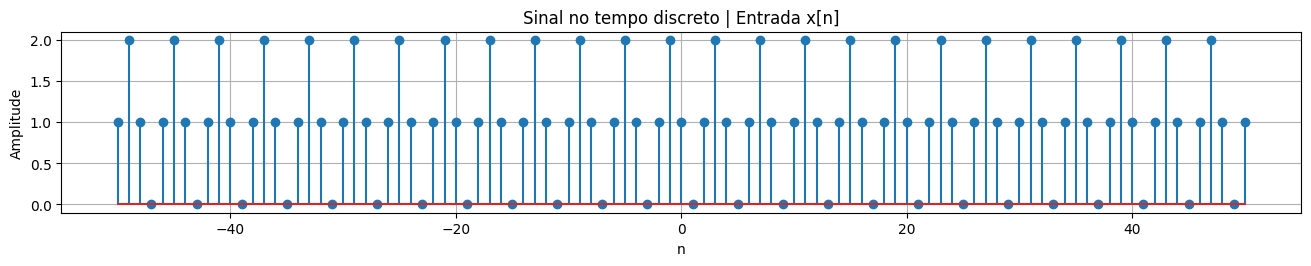

<Figure size 640x480 with 0 Axes>

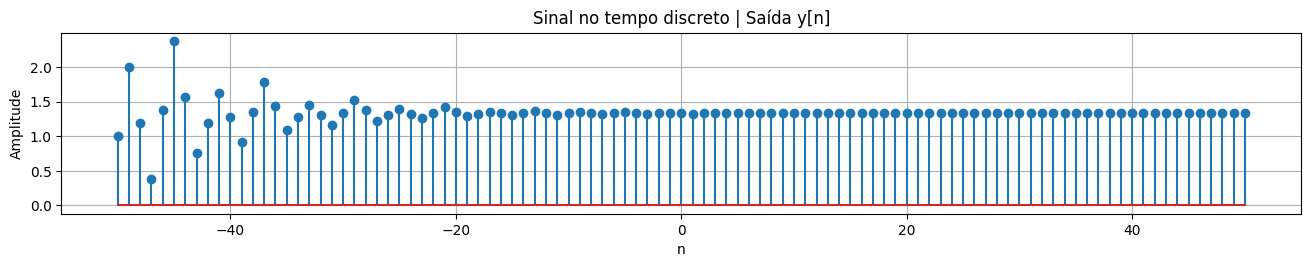

<Figure size 640x480 with 0 Axes>

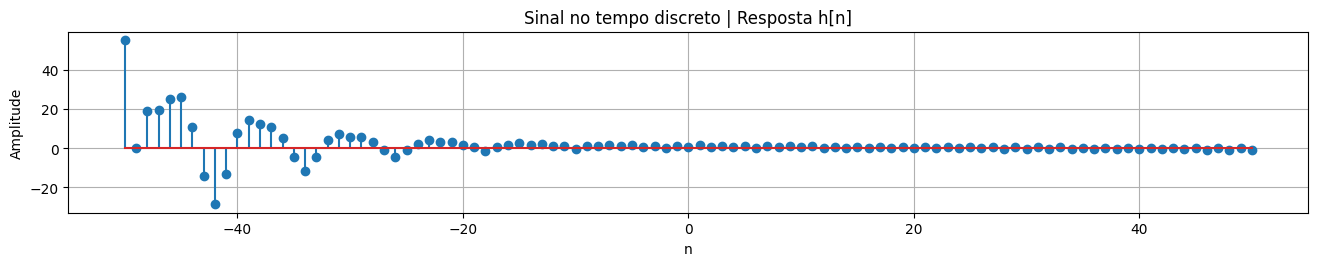

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calcular x[n]
def x(n):
    return 1 + np.cos(0.5 * np.pi * n + np.pi/2)

# Intervalo de n de -50 a 50
n_values = range(-50, 51)

# Inicializando x[n] e y[n]
x_values = [x(n) for n in n_values]
y_values = []

# Calcular y[n]
for n in n_values:
    y_n = 0
    for m in range(4):
        if (n - 2 * m) >= -50:
            y_n += x(n - 2 * m)
    for l in range(1, 4):
        if (n - 2 * l) >= -50:
            y_n -= 0.81 ** l * y_values[n - 2 * l + 50]
    y_values.append(y_n)

### Obtendo Y(e^jw) através de y[n]
sinalY = calcular_dft(y_values)

### Obtendo X(e^jw) através de x[n]
sinalX = calcular_dft(x_values)

### Obtendo H(e^jw) através da relação Y(e^jw) / X(e^jw)
sinalH = sinalY / sinalX

### Obtendo h[n] através da relação H(e^jw)
sinal_h = calcular_idft(sinalH)

# Plotando x[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plotar_sinal_discreto(x_values, range=n_values, title='Entrada x[n]', x='n', y='Amplitude')

# Plotando y[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 2)
plotar_sinal_discreto(y_values, range=n_values, title='Saída y[n]', x='n', y='Amplitude')

# Plotando h[n]
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 3)
plotar_sinal_discreto(sinal_h, range=n_values, title='Resposta h[n]', x='n', y='Amplitude')


---

## Questão 5


In [ ]:
from math import radians

### Caso 2.a

In [ ]:
n = np.linspace(-50, 50, num=100)

In [ ]:
### x[n] =  3cos(0,5πn + 60◦) + 2sen(0,3πn)

sinal_x2a = 3*np.cos(0.5*np.pi*n + radians(60)) + 2*np.sin(0.3*np.pi*n)

### h[n] = (0, 9)^|n|

sinal_h2a = (0.9)**abs(n)

In [ ]:
### X(e^jw)
sinalX2a = calcular_dft(sinal_x2a)

### H(e^jw)
sinalH2a = calcular_dft(sinal_h2a)

### Y(e^jw) = X(e^jw) * H(e^jw)
sinalY2a = sinalX2a * sinalH2a

### Transformando Y(e^jw) para o tempo discreto y[n]
sinal_y2a = calcular_idft(sinalY2a)

<ipython-input-109-26693da91d5e>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sinal, use_line_collection=True)


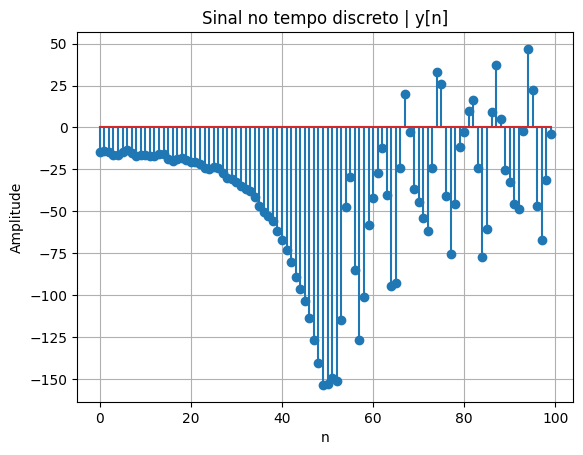

<Figure size 640x480 with 0 Axes>

In [ ]:
plotar_sinal_discreto(sinal_y2a, title='y[n]', x='n', y='Amplitude')

### Caso 2.b

In [ ]:
### x[n] =  3cos(0,5πn + 60◦) + 2sen(0,3πn)

sinal_x2b = 3*np.cos(0.5*np.pi*n + radians(60)) + 2*np.sin(0.3*np.pi*n)

### h[n] = sinc(0,2n)[u(n + 20) − u(n − 20)]

sinal_h2b = np.sinc(0.2*n)*(np.heaviside(n+20, 1) - np.heaviside(n-20, 1))

In [ ]:
### X(e^jw)
sinalX2b = calcular_dft(sinal_x2b)

### H(e^jw)
sinalH2b = calcular_dft(sinal_h2b)

### Y(e^jw) = X(e^jw) * H(e^jw)
sinalY2b = sinalX2b * sinalH2b

### Transformando Y(e^jw) para o tempo discreto y[n]
sinal_y2b = calcular_idft(sinalY2b)

<ipython-input-109-26693da91d5e>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(sinal, use_line_collection=True)


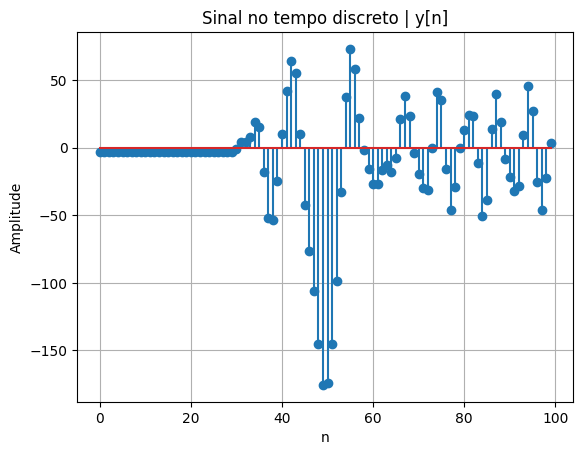

<Figure size 640x480 with 0 Axes>

In [ ]:
plotar_sinal_discreto(sinal_y2b, title='y[n]', x='n', y='Amplitude')